# Imports

In [6]:
# torch installation
#generic
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import PIL
from pathlib import Path
from tqdm import tqdm
from IPython.display import Image
#torch Dependencies
import torch
from torchvision import datasets , transforms
from torch.utils.data import Dataset , DataLoader
import torchvision


#setting cuda for gpu in torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Data Augmentation

## what is Data Augmentation ?
1. Data Augmentation is a technique to add variance in data so that the model generalizes better.
            
2. We Perform data augmentation more specifically image augmentation on Image data for CNNs through simple techniques, such as cropping, rotating, horizontally flip or vertically flip, swapping the channels etc.

![](https://cdn-images-1.medium.com/max/2600/1*bqNylp7FcqIBWg0DrcimUw.png)

## Why do we Need Image Augmentation

##### Suppose you have trained a DL model for Cats and Dogs Classification and all the images are picture perfect i.e the object is in the center and in focus and Images are taken in daylight conditions, therefore your model works fine .

##### Let's discuss three use cases in the context of the above problem.

1. what happens when model sees a half cropped cat image or the object is in not in center and out of focus.
2. What if the model gets a low light image of dog.
3. what if your training image is size is less and it contains certain biases in the images with low variance. For example all the cats photos contains very less background i.e image is zoomed in and model gets an image of cat sitting in a park where the images contains more background.   

##### In all above cases the model will goof up, It will spit out wrong results.

## What is the solution to all above problems
##### Image Augmentation
  1. Augmentation is also a form of adding prior knowledge to a model; e.g. images are rotated, which you know does not change the class label. Increasing training data (as with augmentation) decreases a model's variance. Regularization also decreases a model's variance. They do so in different ways, but ultimately both decrease regularization error.
  
  
  2. A convolutional neural network that can robustly classify objects even if its placed in different orientations is said to have the property called invariance. More specifically, a CNN can be invariant to translation, viewpoint, size or illumination (Or a combination of the above).
  
  
  3. With Data Augmentation you make the model robust even when training set is small by giving inputs of images accounting for most different situations. ex:- Different Lighting conditions. 
![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSTUUnxINkVeJLQVbs8JjTlStNXmT7fW5dfQ3428UZ_yb8JouyS)


###### The above Augmentation is sign board for self driving cars.
###### You can realize the neccesity of image Augmenation from this image as the self driving car should able to recognize the stop sign board in any case

![](https://cdn-images-1.medium.com/max/1600/1*_mgTLhXwWGDEgz_2C7dRDg.png)

###### what are the various augmentation techniques to be performed on different kinds of data
![](https://i.ytimg.com/vi/Kmypbz3wVko/maxresdefault.jpg)




# Do we need Augmentation If training data set is huge?

## Data Augmentation in Pytorch and visualization

1. Pytorch and Keras support a basic set of image augmentation techniques.


2. For more Advance Augmentation refer these libraries [ImgAug](https://imgaug.readthedocs.io/en/latest/), [albumentation](https://github.com/albu/albumentations) and [Augmentor](https://github.com/mdbloice/Augmentor).


3. They  support a wide range of augmentation techniques, allows to easily combine these and to execute them in random order or on multiple CPU cores, has a simple yet powerful stochastic interface and can not only augment images, but also keypoints/landmarks, bounding boxes, heatmaps and segmentation maps.


In [24]:
#Transforms are common image transformations. They can be chained together using Compose.
# pytorch gives many transformation on PIL image so if you get a tensor by default first convert it to PIL image then apply transformation 
# and then convert back to tensor or else it can be used directly
transform = transforms.Compose([transforms.RandomRotation((0,5),resample = PIL.Image.NEAREST), 
                                 transforms.ColorJitter(brightness=0.5, contrast=0, saturation=0, hue=0),
                                 transforms.RandomHorizontalFlip(p=0.5),
                                 transforms.CenterCrop(size=26),
                                transforms.ToTensor()])

In [26]:
trainSet = datasets.CIFAR10(root="./data/pytorch" , train=True,download=True , transform =transforms.ToTensor() ) #This returns the dataset 
trainLoader = DataLoader(trainSet , batch_size=8) # Data loader. Combines a dataset and a sampler, and provides single- or multi-process iterators over the dataset.
trainSetAug = datasets.CIFAR10(root="./data/pytorch" , train=True,download=True,transform=transform) #This returns the dataset 
trainLoaderAug = DataLoader(trainSetAug , batch_size=8) # Data loader. Combines a dataset and a sampler, and provides single- or multi-process iterators over the dataset.
classes = ('plane', 'car', 'bird', 'cat' , 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')# cifar 10 classes

Files already downloaded and verified
Files already downloaded and verified


In [21]:
def denormalize(image):
  #because pytorch takes data in C * H * W  order we need to convert to H * W* C for visualizing in pytorch
  image = image.permute(1,2,0) # it transposes the dimensions
  return image
  

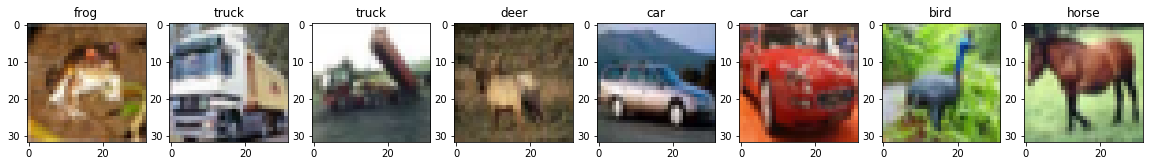

In [36]:
#As we can see we have given batch size of 8 so
# visualizing the image
images , labels = next(iter(trainLoader))
nrows=1
ncols = len(images)//nrows 
plt.figure(figsize=(20,7))
for i in range(len(images)):
  plt.subplot(nrows,ncols,i+1)
  plt.grid(False)
  plt.imshow(denormalize(images[i]))
  plt.title(classes[labels[i]])
plt.show()

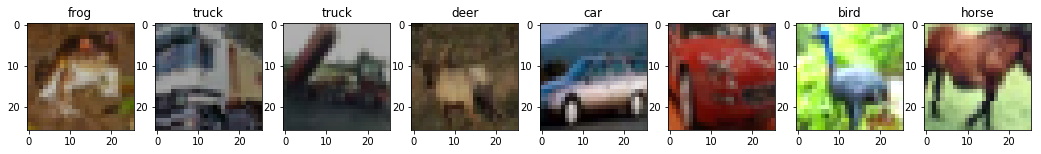

In [38]:
images , labels = next(iter(trainLoaderAug))
nrows=1
ncols = len(images)//nrows 
plt.figure(figsize=(18,7))
for i in range(len(images)):
  plt.subplot(nrows,ncols,i+1)
  plt.grid(False)
  plt.imshow(denormalize(images[i]))
  plt.title(classes[labels[i]])
plt.show()

### Let's see something different

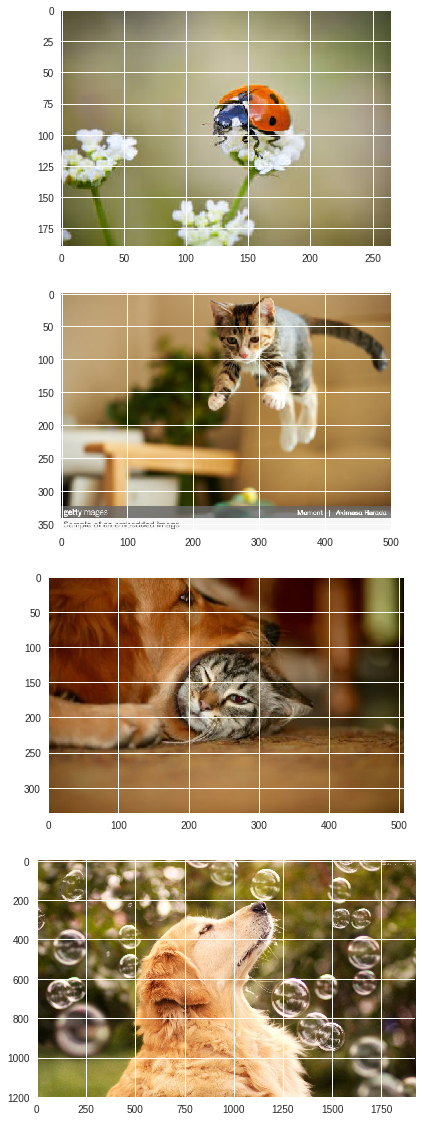

In [6]:
# make your data 
from pathlib import Path
import requests

def download_images(root_dir , list_of_images):
  for index , image_url in enumerate(list_of_images):
    r = requests.get(image_url , stream=True)
    with open(root_dir/"{}.jpg".format(index) , "wb") as f:
      for chunks in r.iter_content(chunk_size=1024):
        if chunks:
          f.write(chunks)

list_of_images = [
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRTEJpqf8laCz0tzwRVdQA-kVMkUorZqVtc9CvYsHvtHSjqb2v6",
    "https://www.gettyimages.in/gi-resources/images/Embed/new/embed2.jpg",
    "http://www.personal.ceu.hu/students/17/Marina_Tomovic/Images/955d4284905d149ea4967ff586e89b41.jpg",
    "https://d12m9erqbesehq.cloudfront.net/wp-content/uploads/sites/5150/2016/04/13100027/images-4.jpg",
]
root_dir = Path("my_data/train")
if not root_dir.exists():
  root_dir.mkdir(parents=True)
  
download_images(root_dir , list_of_images)
index=0
plt.figure(figsize=(20,20))
for i in datasets.ImageFolder(str(root_dir/"..")):
  index+=1
  plt.subplot(4,1 ,index)
  plt.imshow(i[0])      

## Normalization

In [7]:
#Other important technique is normalization of image we do a channel wise normalization by subtracting the channel wise mean by standard deviation 
# we perform this to keep all the input images in similar range and thus getting a stable gradient
train_data = datasets.CIFAR10('./data/pytorch', train=True)
# use np.concatenate to stick all the images together to form a 1600000 X 32 X 3 array
x = np.concatenate([np.asarray(train_data[i][0]) for i in range(len(train_data))], axis=0)
# print(x)
print(x.shape)
# calculate the mean and std along the (0, 1) axe
mean = np.mean(x,axis=(0,1))
std=np.std(x,axis=(0,1))
print(mean , std)
mean , std = torch.tensor([0.485, 0.456, 0.406]),torch.tensor([0.229, 0.224, 0.225]) 


(1600000, 32, 3)
[125.30691805 122.95039414 113.86538318] [62.99321928 62.08870764 66.70489964]


In [0]:
# The Updated transforms with normalization 
transform = transforms.Compose([transforms.RandomAffine((5,10), scale=(1,1.5) ,resample=PIL.Image.NEAREST),
                                transforms.RandomHorizontalFlip(p=0.5),
                                transforms.Resize((224,224)),
                                transforms.ToTensor(),
                                transforms.Normalize(mean ,std)]) ## normalize
trainset = datasets.ImageFolder(str(root_dir/"..") , transform)
trainLoader = DataLoader(trainset , batch_size=4,shuffle=True)


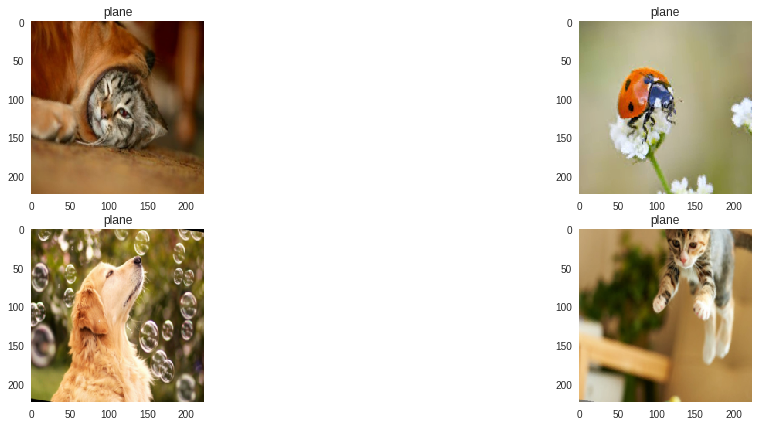

In [11]:
def denormalize(image):
  image = transforms.Normalize(-mean/std,1/std)(image) #denormalize
  image = image.permute(1,2,0) 
  image = torch.clamp(image,0,1)
  return image

data = next(iter(trainLoader))
images , labels = data
nrows=2
ncols = len(data[0])//nrows 
plt.figure(figsize=(18,7))
for i in range(len(images)):
  plt.subplot(nrows,ncols,i+1)
  plt.grid(False)
  plt.imshow(denormalize(images[i]))
  plt.title(classes[labels[i]])
plt.show()

##### So now that you have learnt Data Augmentation techniques.  The problem statement should be scrtunized well before applying any augmentation to the dataset. 
For example in Aeroplane detection there is no need of genrating a vertically flipped image it is higly unlikely you will get these kind of images

![](https://proxy.duckduckgo.com/iu/?u=http%3A%2F%2Fimageprocessor.org%2Fassets%2Fimg%2Fflip%2Fvertical%2Fplane.jpg&f=1)

#### Don't increase irrelevant data.

# Additional Resources
1.  https://pytorch.org/docs/stable/torchvision/index.html

2. http://cs231n.stanford.edu/reports/2017/pdfs/300.pdf

3. https://pytorch.org/docs/stable/tensors.html

4. https://github.com/fabioperez/pytorch-examples/tree/master/notebooks

5. https://keras.io/preprocessing/image/ (For Keras Implementation of same thing)

6. [Ploting image in numpy](https://matplotlib.org/users/image_tutorial.html#plotting-numpy-arrays-as-images)